# Modelo de Regresión con datos de la ciudad de Boston
## Regression model with data from the city of Boston

In [23]:
# importo las librerías que necesito.
# import libraries.
import numpy as np
from numpy import arange
from numpy import std
from numpy import absolute
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.inspection import permutation_importance
from tabulate import tabulate

In [2]:
# doy nombre a las columnas.
# defining column names.
columnes= ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# definiendo la variable dependiente.
# defining label.
columna_y = ['MEDV']
# importo dataset.
# importing dataset.
housing = pd.read_csv('C:\housing_data.csv', names = columnes, header= None, encoding = "ISO-8859-1" )

**Descripción de las variables**

Variable descripcion

- CRIM -> taxa de criminalitat per cápita per ciutat.
- ZN -> proporció de sòl residencial zonificat per a lots de més de 25.000 metres cuadrats
- INDUS -> proporció d'hectàrees comercials no minoristes per ciutat
- CHAS -> variable ficticia de Charles River (=1 si el tram limita el riu; 0 en cas contrari)
- NOX -> concentració d'òxids nítrics (parts per 10 milions)
- RM -> nombre mitjà d'habitacions per habitatge
- AGE -> proporció d'unitats ocupades pels propietaris construïdes abans de 1940.
- DIS -> distàncices ponderades fins a cinc centres de treball de boston
- RAD -> índex d'accessibilitat a les carreteres radials.
- TAX -> Taxa de l'impost sobre béns inmobles de valor total per 10.000 dólars
- PTRATIO -> ràtio alumnes professor per municipi.
- B -> 1000(BK - 0.63)^2 on BK és la proporció de negres per ciutat.
- LSTAT -> % d'estatus inferior de la població.
- MEDV -> Valor mitjà de les cases opcupades pel propietari per 1000 dolars.

## Preprocesamiento / Preprocessing

In [3]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## elementos duplicados / duplicated elements

In [4]:
# miro si hay elementos duplicados
# check for duplicate items
housing_clean = housing.drop_duplicates()
if len(housing_clean) == len(housing):
    print("No hi ha elements duplicats")
else:
    print("Hi ha elements duplicats")

No hi ha elements duplicats


## elementos nuls / null elements

In [5]:
# compruebo si hay elementos nulos.
# check for null elements.
housing.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# compruebo si hay elementos nulos.
# check for null elements.
(housing.isnull().sum())*100 / len(housing)

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

## columnas dummy / dummie columns

In [7]:
housing_dummy = housing
# hago la variable dummy
# making the dummy variable
housing_dummy_CHAS= pd.get_dummies(housing["CHAS"], prefix = "CHAS")

# agregamos las columnas
# adding the columns
housing_dummy = pd.concat([housing_dummy, housing_dummy_CHAS], axis = 1)
housing_dummy = housing_dummy.rename(columns={'CHAS_1' : 'RIVER_LIMIT', 'CHAS_0' : 'NO_RIVER'})
housing_dummy_1 = housing_dummy.drop(["CHAS"], axis = 1)
housing_dummy_1

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NO_RIVER,RIVER_LIMIT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,1,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,1,0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,1,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,1,0


In [8]:
columnes_amb_dummy = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV','NO_RIVER','RIVER_LIMIT']
# les variables independents
columnes_X = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','NO_RIVER','RIVER_LIMIT']
# per l'exercici 5 trio les variables independents sense 'RM'
columnes_X_exercici_5 = ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','NO_RIVER','RIVER_LIMIT']

## estandaritzación / standardization

In [9]:
# defino el scaler
# defining the scaler
scaler = RobustScaler()
# transformo
# transforming
df = scaler.fit_transform(housing_dummy_1)
# convierto la array en DataFrame
# converting the array to DataFrame
housing_scaled_df = pd.DataFrame(df, columns=columnes_amb_dummy)
# mostro resultat
# showing the result
housing_scaled_df_1 = housing_scaled_df.drop('MEDV', axis = 1)
housing_scaled_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NO_RIVER,RIVER_LIMIT
0,-0.069593,1.44,-0.571650,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681,0.351097,0.0,0.0
1,-0.063755,0.00,-0.202943,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889,0.050157,0.0,0.0
2,-0.063760,0.00,-0.202943,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634,1.692790,0.0,0.0
3,-0.062347,0.00,-0.581720,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579,1.529781,0.0,0.0
4,-0.052144,0.00,-0.581720,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699,1.880878,0.0,0.0


### Variables dependientes y independientes / feature and label

In [10]:
# defino la variable dependiente
# defining label
y = housing_scaled_df['MEDV'].values
# eliminamos la variable dependiente de las variables independientes
# eliminating the dependent variable from the independent variables
X = housing_scaled_df.drop('MEDV', axis=1)
# guardamos features
# saving features
feature_list = list(X.columns)
# convertimos en numpy array
# convert to numpy array
X = X.values

### Creamos conjuntos de entrenamiento y prueba / Creating training and test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 10)
print(X_train.shape); print(X_test.shape)

(404, 14)
(102, 14)


## Creo dos modelos de regresión para predecir / Creating two regression models to predict

**Random Forest Regressor**

In [12]:
rf = RandomForestRegressor(n_estimators = 300, random_state = 30)
# ajustamos entrenamiento.
# fitting training.
model_rf = rf.fit(X_train, y_train)
# prediciendo entrenamiento.
# predicting training.
pred_train_rf = rf.predict(X_train)
# imprimo métricas de entrenamiento.
# printing training results-
r2_rf_train = r2_score(y_train, pred_train_rf).round(3)
mse_rf_train = mean_squared_error(y_train, pred_train_rf).round(3)
print('Dades entrenament')
print(r2_rf_train)
print(mse_rf_train)
# predeciciendo evaluación
# predicting test
pred_test_rf = rf.predict(X_test)
# imprimim métriques d'avaluació.
# printing test results.
r2_rf = r2_score(y_test, pred_test_rf).round(3)
mse_rf = mean_squared_error(y_test, pred_test_rf).round(3)
print('Dades evaluació')
print(r2_rf)
print(mse_rf)

Dades entrenament
0.98
0.024
Dades evaluació
0.856
0.237


In [26]:
# realizo la validación cruzada
# cross validation

kf = KFold(n_splits = 5)
score = cross_val_score(rf, X_test, y_test, cv = kf)
score_mean = score.mean().round(2)
print(score_mean)

0.61


In [13]:
# miro cuales son las variables más importantes.
# looking at which are the most important variables.
rf.feature_importances_

array([0.0357982 , 0.00100047, 0.00545444, 0.0228093 , 0.33724513,
       0.01399719, 0.05744207, 0.00328506, 0.01255063, 0.013681  ,
       0.01529488, 0.48014867, 0.00068541, 0.00060754])

<BarContainer object of 14 artists>

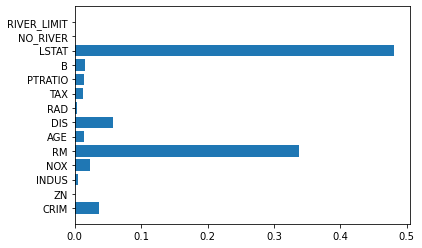

In [14]:
plt.barh(feature_list, rf.feature_importances_)

**Modelo Elastic Net / Elastic Net Model**

In [15]:
# escogemos el tipo de modelo
# choosing the model
model_enet = ElasticNet(alpha = 0.10)
# ajustamos entrenamiento
# fitting training
model_enet.fit(X_train, y_train)
# predecimos entrenamiento
# predicting training
pred_enet_train = model_enet.predict(X_train)
# obtenemos R2
# obtaining R2
r2_enet_train = r2_score(y_train, pred_enet_train).round(3)
# obtenemos MSE entrenamiento
# obtaining training MSE result
mse_enet_train = mean_squared_error(y_train, pred_enet_train).round(3)
print('Dades entrenament')
print(r2_enet_train)
print(mse_enet_train)
# ajustamos evaluación
# fitting test
pred_test_enet = model_enet.predict(X_test)
# imprimos métrica de evaluación
# printing test evaluation
r2_enet = r2_score(y_test, pred_test_enet).round(3)
mse_enet = mean_squared_error(y_test, pred_test_enet).round(3)
print('Dades avaluació')
print(r2_enet)
print(mse_enet)

Dades entrenament
0.686
0.38
Dades avaluació
0.611
0.64


In [29]:
# realizo la validación cruzada
# cross validation

kf = KFold(n_splits = 5)
score = cross_val_score(model_enet, X_test, y_test, cv = kf)
score_mean = score.mean().round(2)
print(score_mean)

0.47


C:\Users\imber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.398e+01, tolerance: 1.316e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\imber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.686e+01, tolerance: 1.358e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

## Intentamos mejorar la predicción / Improving the prediction

**Random Forest**

In [16]:
# comprobamos los parámetros
# cheking the parameters
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 30, 'verbose': 0, 'warm_start': False}


In [17]:
# intentamos mejorar el modelo y realizamos RandomizedSearch para buscar los mejores parámetros
# improving the model and perform RandomizedSearch to find the best parameters
# número de árboles
# number of trees
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num=10)]
# número de features a considerar en cada división.
# number of features to consider in each division.
max_features = ['auto', 'sqrt']
# número máximo de niveles en el árbol.
# maximum number of levels in the tree.
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# número mínimo de muestras requeridas para dividir node.
# minimum number of samples required to split node.
min_samples_split = [2,5,10]
# número mínimo de muestras requeridas para cada hoja de node.
# minimum number of samples required for each node leaf.
min_samples_leaf = [1,2,4]
# método de selección de muestras para entrenar cada árbol.
# sample selection method to train each tree.
bootstrap = [True, False]
# creamos la red aleatoria.
# creating the random network.
random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [18]:
# buscamos los mejores parámetros.
# checking the best parameters.
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                              n_iter = 100, cv = 5, verbose = 2, random_state = 42,
                              n_jobs = -1)
rf_random.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=300,
                                                   random_state=30),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [19]:
# estos son los mejores parámetros para mejorar el modelo.
# the best parameters to improve the model.
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [20]:
rf = RandomForestRegressor(n_estimators = 400,
                           min_samples_split = 2,
                           min_samples_leaf = 1,
                           max_features = 'sqrt',
                           max_depth = None,
                           bootstrap = False)
# ajustamos entrenamiento
# fitting training
model_rf = rf.fit(X_train, y_train)
# predecimos entrenamiento
# predicting training
pred_train_rf = rf.predict(X_train)
# imprimimos métricas de resultados.
# printing the results.
r2_rf_train_opt = r2_score(y_train, pred_train_rf).round(3)
mse_rf_train_opt = mean_squared_error(y_train, pred_train_rf).round(3)
print('Dades entrenament')
print(r2_rf_train_opt)
print(mse_rf_train_opt)
# predecimos evaluación.
# predicting test.
pred_test_rf_opt = rf.predict(X_test)
# imprimimos métricas de resultados.
# printing the results.
r2_rf_test_opt = r2_score(y_test, pred_test_rf_opt).round(3)
mse_rf_test_opt = mean_squared_error(y_test, pred_test_rf_opt).round(3)
print('Dades evaluació')
print(r2_rf_test_opt)
print(mse_rf_test_opt)

Dades entrenament
1.0
0.0
Dades evaluació
0.848
0.25


In [30]:
# realizo la validación cruzada
# cross validation

kf = KFold(n_splits = 5)
score = cross_val_score(rf, X_test, y_test, cv = kf)
score_mean = score.mean().round(2)
print(score_mean)

0.6


**Una vez aplicada la mejora de parámetros observamos que los datos de entrenamiento mejoran de 0,98 a  1, por tanto llegamos a un resultado óptimo, y los datos de evaluación pasan de 0,86 a 0,84 y mse de 0,24 a 0,26**


Once the improvement of parameters is applied, we observe that the training data improves from 0.98 to 1, therefore we reach an optimal result, and the evaluation data goes from 0.86 to 0.84 and mse from 0, 24 to 0.26

**Modelo Elastic Net / Elastic Net Model**

In [21]:
model = ElasticNet()
# buscamos los mejores parámetros.
# checking the best parameters.
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state = 1)
# definimos la red
# defining the grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# definimos la búsqueda
# defining the search
search = GridSearchCV(model, grid, scoring = 'neg_mean_absolute_error', cv=cv, n_jobs = -1)
# entrenamos entrenamiento.
# fitting train.
results = search.fit(X_train, y_train)
# obtenemos resultados.
# printing the results
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.399
Config: {'alpha': 0.1, 'l1_ratio': 0.0}


C:\Users\imber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.023e+01, tolerance: 4.889e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [22]:
# escogemos el tipo de modelo.
# choosing the model.
model_enet = ElasticNet(alpha = 0.01, l1_ratio = 0.0)
# ajustamos entrenamiento
# fitting training
model = model_enet.fit(X_train,y_train)
# predecimos entrenamiento
# predicting training
pred_train_enet = model_enet.predict(X_train)
# imprimimos métricas de entrenamiento
# printing training results.
r2_enet_train_opt = r2_score(y_train, pred_train_enet).round(3)
mse_enet_train_opt = mean_squared_error(y_train, pred_train_enet).round(3)
print('Dades entrenament')
print(r2_enet_train_opt)
print(mse_enet_train_opt)
# predecimos evaluación.
# predicting test.
pred_test_enet = model_enet.predict(X_test)
# imprimimos métricas de entrenamiento
# printing training results.
r2_enet_test_opt = r2_score(y_test, pred_test_enet).round(3)
mse_enet_test_opt = mean_squared_error(y_test, pred_test_enet).round(3)
print('Dades evaluació')
print(r2_enet_test_opt)
print(mse_enet_test_opt)

Dades entrenament
0.748
0.305
Dades evaluació
0.67
0.542


C:\Users\imber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.450e+01, tolerance: 4.889e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [31]:
# realizo la validación cruzada
# cross validation

kf = KFold(n_splits = 5)
score = cross_val_score(model_enet, X_test, y_test, cv = kf)
score_mean = score.mean().round(2)
print(score_mean)

0.47


C:\Users\imber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.398e+01, tolerance: 1.316e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\imber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.686e+01, tolerance: 1.358e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea